# Assignment: Association Rule - Book dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
df = pd.read_csv('book.csv')
#viewing dataset
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
df.shape

(2000, 11)

In [5]:
df.shape

(2000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.nunique()

ChildBks     2
YouthBks     2
CookBks      2
DoItYBks     2
RefBks       2
ArtBks       2
GeogBks      2
ItalCook     2
ItalAtlas    2
ItalArt      2
Florence     2
dtype: int64

In [10]:
book_count = []
col_names = df.columns
for col_name in col_names:
    book_count.append(df[col_name].value_counts()[1])
book_count

[846, 495, 862, 564, 429, 482, 552, 227, 74, 97, 217]

<BarContainer object of 11 artists>

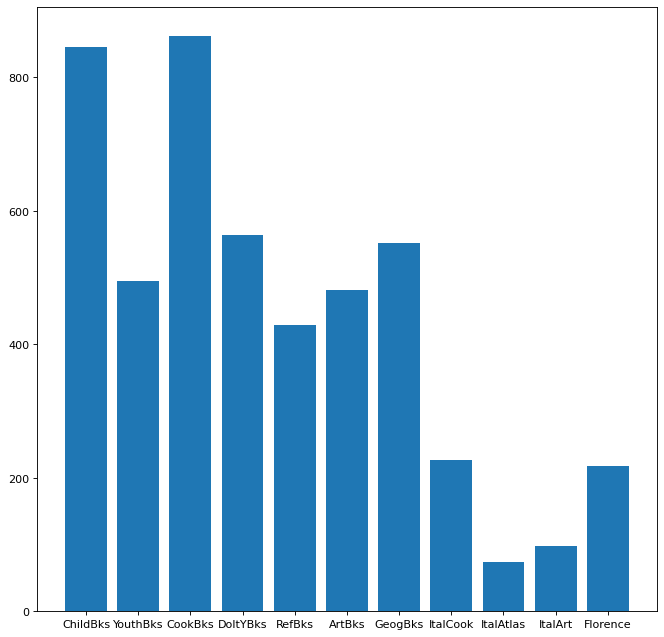

In [11]:
plt.figure(figsize=(10, 10), dpi=80)    
plt.bar(col_names, book_count)

In [116]:
print(str('Any missing data or NaN in the dataset:'), df.isnull().values.any())


Any missing data or NaN in the dataset: False


In [117]:
frequent_itemsets1 = apriori(df, min_support = 0.01, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
589,0.0125,"(ItalCook, ArtBks, CookBks, RefBks, ItalArt, I...",6
590,0.0145,"(CookBks, ChildBks, RefBks, ArtBks, GeogBks, Y...",7
591,0.0105,"(ItalCook, ArtBks, CookBks, ChildBks, GeogBks,...",7
592,0.0100,"(ItalCook, ArtBks, GeogBks, CookBks, ChildBks,...",7


In [118]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
11097,(CookBks),"(ItalCook, ArtBks, ChildBks, RefBks, ItalArt, ...",0.4310,0.0110,0.011,0.025522,2.320186,0.006259,1.014902
11098,(ChildBks),"(ItalCook, CookBks, ArtBks, RefBks, ItalArt, I...",0.4230,0.0125,0.011,0.026005,2.080378,0.005712,1.013865
11099,(RefBks),"(ItalCook, CookBks, ArtBks, ChildBks, ItalArt,...",0.2145,0.0110,0.011,0.051282,4.662005,0.008640,1.042459
11100,(ItalArt),"(ItalCook, CookBks, ArtBks, ChildBks, RefBks, ...",0.0485,0.0115,0.011,0.226804,19.722098,0.010442,1.278460


In [119]:
rules1 = association_rules(frequent_itemsets1, metric ="lift", min_threshold = 1)
rules1 = rules1.sort_values(['confidence', 'lift'], ascending =[False, False])
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7879,"(ItalAtlas, ArtBks, GeogBks)","(ItalArt, RefBks)",0.0115,0.0200,0.0115,1.000000,50.000000,0.011270,inf
10048,"(ItalAtlas, ChildBks, ArtBks, GeogBks)","(ItalArt, RefBks)",0.0100,0.0200,0.0100,1.000000,50.000000,0.009800,inf
9623,"(ItalAtlas, ChildBks, CookBks, GeogBks)","(ItalCook, RefBks)",0.0135,0.0465,0.0135,1.000000,21.505376,0.012872,inf
3735,"(ItalAtlas, ArtBks, GeogBks)",(ItalArt),0.0115,0.0485,0.0115,1.000000,20.618557,0.010942,inf
6493,"(ItalAtlas, ChildBks, ArtBks, GeogBks)",(ItalArt),0.0100,0.0485,0.0100,1.000000,20.618557,0.009515,inf
...,...,...,...,...,...,...,...,...,...
4177,(CookBks),"(ItalArt, ChildBks, GeogBks, YouthBks)",0.4310,0.0110,0.0100,0.023202,2.109260,0.005259,1.012492
8670,(CookBks),"(ArtBks, GeogBks, ChildBks, YouthBks, ItalArt)",0.4310,0.0110,0.0100,0.023202,2.109260,0.005259,1.012492
5377,(CookBks),"(ItalArt, ChildBks, GeogBks, RefBks)",0.4310,0.0120,0.0100,0.023202,1.933488,0.004828,1.011468
9416,(CookBks),"(ArtBks, ChildBks, GeogBks, RefBks, ItalArt)",0.4310,0.0120,0.0100,0.023202,1.933488,0.004828,1.011468


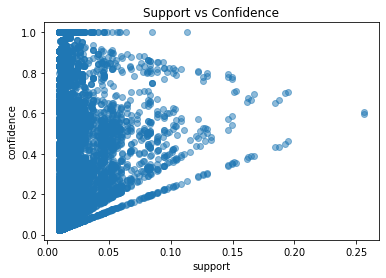

In [120]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [121]:
rules2 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
3267,"(ItalAtlas, ItalArt, ChildBks)","(ItalCook, CookBks, ArtBks, RefBks)",0.0145,0.0235,0.0110,0.758621,32.281731,0.010659,4.045500
3268,"(ItalAtlas, ItalArt, RefBks)","(ItalCook, CookBks, ArtBks, ChildBks)",0.0165,0.0455,0.0110,0.666667,14.652015,0.010249,2.863500
3269,"(ItalAtlas, ArtBks)","(ItalCook, CookBks, ChildBks, RefBks, ItalArt)",0.0180,0.0145,0.0110,0.611111,42.145594,0.010739,2.534143
3270,"(ItalArt, RefBks)","(ItalCook, CookBks, ArtBks, ChildBks, ItalAtlas)",0.0200,0.0115,0.0110,0.550000,47.826087,0.010770,2.196667


In [122]:
rules2 = rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2336,"(ItalAtlas, ArtBks, GeogBks)","(ItalArt, RefBks)",0.0115,0.0200,0.0115,1.0,50.000000,0.011270,inf
2917,"(ItalAtlas, ChildBks, ArtBks, GeogBks)","(ItalArt, RefBks)",0.0100,0.0200,0.0100,1.0,50.000000,0.009800,inf
2769,"(ItalAtlas, ChildBks, CookBks, GeogBks)","(ItalCook, RefBks)",0.0135,0.0465,0.0135,1.0,21.505376,0.012872,inf
1156,"(ItalAtlas, ArtBks, GeogBks)",(ItalArt),0.0115,0.0485,0.0115,1.0,20.618557,0.010942,inf
1925,"(ItalAtlas, ChildBks, ArtBks, GeogBks)",(ItalArt),0.0100,0.0485,0.0100,1.0,20.618557,0.009515,inf
...,...,...,...,...,...,...,...,...,...
831,"(DoItYBks, ArtBks, ItalArt)",(YouthBks),0.0300,0.2475,0.0150,0.5,2.020202,0.007575,1.505
1248,"(ArtBks, ItalArt, CookBks, ChildBks)",(YouthBks),0.0300,0.2475,0.0150,0.5,2.020202,0.007575,1.505
1982,"(DoItYBks, CookBks, ItalArt, ArtBks)",(YouthBks),0.0270,0.2475,0.0135,0.5,2.020202,0.006817,1.505
2048,"(Florence, CookBks, ArtBks, GeogBks)",(YouthBks),0.0230,0.2475,0.0115,0.5,2.020202,0.005808,1.505


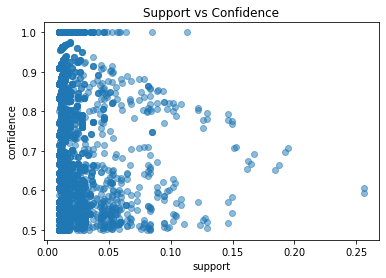

In [123]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [124]:
frequent_itemsets2 = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [125]:
rules3 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


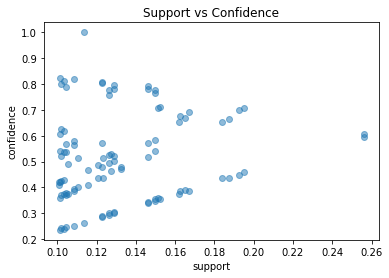

In [126]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [127]:
rules4 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)
rules4


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


In [128]:
rules4 = rules4.sort_values(['confidence', 'lift'], ascending =[False, False])
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
40,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
44,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
47,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
25,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
24,"(CookBks, RefBks)",(ChildBks),0.1525,0.4230,0.1225,0.803279,1.899004,0.057993,2.933083
37,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.4230,0.1020,0.800000,1.891253,0.048067,2.885000
16,"(CookBks, YouthBks)",(ChildBks),0.1620,0.4230,0.1290,0.796296,1.882497,0.060474,2.832545
21,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
34,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.4230,0.1045,0.788679,1.864490,0.048452,2.730446


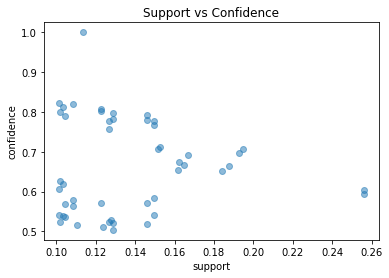

In [129]:
plt.scatter(rules4['support'], rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [130]:
frequent_itemsets3 = apriori(df, min_support = 0.2, use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [131]:
rules5 = association_rules(frequent_itemsets3, metric="lift", min_threshold=0.1)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


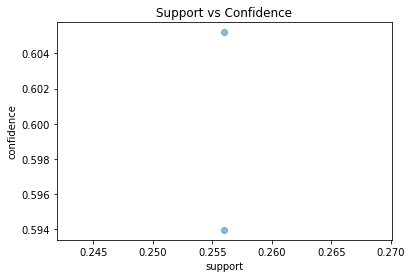

In [132]:
plt.scatter(rules5['support'], rules5['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [133]:
rules6 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.5)
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [134]:
rules6 = rules6.sort_values(['confidence', 'lift'], ascending =[False, False])
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


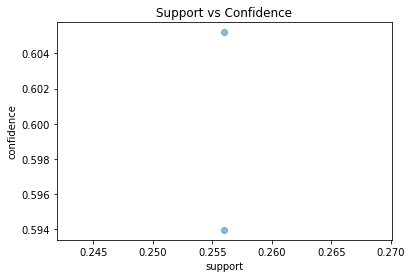

In [135]:
plt.scatter(rules6['support'], rules6['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()